# D212: Data Mining II - Task 2
***

### By: Leng Yang
### Student ID: 012298452
### Date: October 6, 2024
***
<br>
<br>
<br>

## Table of Contents
* [A1. Proposal of Question](#A1)
* [A2. Defined Goal](#A2)
* [B1. Explanation of PCA](#B1)
* [B2. PCA Assumption](#B2)
* [C1. Continuous Data Set Variables](#C1)
* [C2. Standardization of Data Set Variables](#C2)
* [D1. Principal Components](#D1)
* [D2. Identification of the Total Number of Components](#D2)
* [D3. Variance of Each Component](#D3)
* [D4. Total Variance Captured by Components](#D4)
* [D5. Summary of Data Analysis](#D5)
* [E. Sources for Third-Party Code](#E)
* [F. Sources](#F)

<BR>

<BR>

<BR>

<BR>

<BR>

<BR>

<BR>

## A1. Proposal of Question <a class="anchor" id="A1"></a>

The research question of focus is: Can PCA reduce the dimensionality of the medical data set and thus determine the optimal number of principal components?

<BR>

## A2. Defined Goal <a class="anchor" id="A2"></a>

This analysis aims to perform Principal Component Analysis (PCA) to reduce the dimensionality of the medical data set. This is relevant as the data set contains over 50 variables, and with so many variables, it would slow down data analysis processes by a considerable amount. Reducing the dimensionality tackles this problem by allowing faster computations during data modeling, thus reducing the time it takes to analyze data while limiting the amount of information lost during the data reduction. While PCA alone doesn't explicitly help to understand patient characteristics, the technique allows for data extraction while minimizing information loss. This extraction could then be used for further data analysis.

<BR>

## B1. Explanation of PCA <a class="anchor" id="B1"></a>

PCA is a method used to reduce the dimensionality of large data sets. The method transforms a large set of variables into a smaller set that still contains most information, minimizing information loss. The method takes the original variables of the data set and organizes them into new variables known as Principal Components or PCs. The number of PCs created matches the number of original variables used for PCA, with each PC containing some information from the original variables, namely as linear combinations of the original variables. Additionally, these PCs are created so that they are uncorrelated with each other, whereby the information contained in each works to maximize the variance of the data. The variance of the data is essential here, as the more significant the variance, the larger the information is captured (Principal Component Analysis (PCA) explained, n.d.).

The expected outcome is to use PCA to reduce the dimensionality of the medical data set. After the PCs are created, using the Kaiser method, only the most essential PCs will be selected, thus further reducing the total number of features. The PCs could then be used for further analysis.

<BR>

## B2. PCA Assumption <a class="anchor" id="B2"></a>

One assumption of PCA is that there is a linear relationship between all of the variables. These linear relationships represent an underlying assumption for PCA because the analysis works based on Pearson correlation coefficients (Principal components analysis (PCA) using SPSS statistics, n.d.).

<BR>

## C1. Continuous Data Set Variables <a class="anchor" id="C1"></a>

The continuous variables from the data set to be used for analysis are listed below.
* Latitude
* Longitude
* Income
* Vitamin D levels
* Initial days
* Total charges
* Additional charges

<BR>

## C2. Standardization of Data Set Variables <a class="anchor" id="C2"></a>

The cleaned and prepared data set is attached as "D212_Task2_Data.csv."

In [11]:
#Load in necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [13]:
df = pd.read_csv('medical_clean.csv')

# Standardize column names using snake_case and re-express names for comprehensiveness
col_names = ['case_order', 'customer_id', 'interaction', 'uid', 'city', 'state', 'county', 'zip', 'latitude', 'longitude',
             'population', 'area', 'timezone', 'job', 'children', 'age', 'income', 'marital', 'gender', 'readmission', 
             'vit_d_level', 'doc_visits', 'full_meals_eaten', 'vit_d_supp', 'soft_drink', 'initial_admin', 'high_blood', 'stroke', 'complication_risk', 'overweight',
             'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain', 'anxiety', 'allergic_rhinitis', 'reflux_esophagitis', 'asthma', 'services', 'initial_days', 
             'total_charge', 'additional_charges', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'item_6', 'item_7', 'item_8']
df.columns = col_names

#Select interested variables and standardize values
cnt_df = df[['latitude','longitude','income','vit_d_level','initial_days','total_charge','additional_charges']]

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(cnt_df), columns=cnt_df.columns)

#Generate csv file of prepared data set
scaled_df.to_csv('D212_Task2_Data.csv', index=False)

<BR>

## D1. Principal Components <a class="anchor" id="D1"></a>

The loading matrix of all the principal components is seen below.

In [15]:
#Instantiate and fit and transform PCA model
model = PCA(n_components=scaled_df.shape[1], random_state=42)
model.fit_transform(scaled_df)

matrix = pd.DataFrame(model.components_.T, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'], index=scaled_df.columns)
matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
latitude,-0.012385,0.707635,0.012997,-0.008349,-0.093509,0.700082,0.001355
longitude,-0.011393,-0.698869,-0.109214,-0.088224,-0.112635,0.692138,-0.000174
income,-0.019039,-0.086107,0.621626,0.392351,0.651181,0.166813,0.001180
vit_d_level,-0.003094,0.058388,-0.576982,-0.328228,0.744122,0.047118,-0.001440
initial_days,0.706503,0.000265,0.022866,-0.020951,0.009143,0.014145,-0.706830
total_charge,0.706831,-0.001082,0.007592,-0.000811,0.009079,0.013292,0.707157
additional_charges,0.024252,-0.003272,-0.517683,0.854420,-0.025478,0.020168,-0.017759


<BR>

## D2. Identification of the Total Number of Components <a class="anchor" id="D2"></a>

The eigenvalues are extracted from the model's `explained_variance_` attribute and visualized in a scree plot. Using the Kaiser rule, PCs with eigenvalues greater than one are kept, and anything below is dropped. From the visualization and the list of eigenvalues, the first 3 PCs are kept as they contain eigenvalues of greater than one.

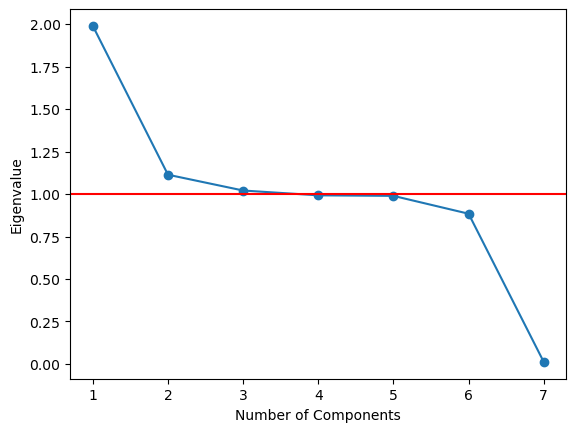

In [24]:
# Extract eigenvalues
eigenvalues =  pd.Series(model.explained_variance_, index=range(1,8))

# Create scree plot with reference line at eigenvalue = 1 to determine PCs based on Kaiser Rule
plt.plot(eigenvalues, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r')
plt.show();

In [26]:
# Print eigenvalues to determine cutoff
eigenvalues

1    1.989107
2    1.113571
3    1.020590
4    0.992281
5    0.989056
6    0.884053
7    0.012043
dtype: float64

<BR>

## D3. Variance of Each Component <a class="anchor" id="D3"></a>

Listed are the variance and variance ratios of the significant principal components. The variance ratios are expressed in percentages, such as for PC1, which captures the most variance at 28.41%.

In [28]:
pd.Series(model.explained_variance_[:3], index=['PC1','PC2','PC3'])

PC1    1.989107
PC2    1.113571
PC3    1.020590
dtype: float64

In [30]:
var_ratio = pd.Series(model.explained_variance_ratio_[:3]*100, index=['PC1','PC2','PC3'])
var_ratio

PC1    28.412968
PC2    15.906567
PC3    14.578394
dtype: float64

<BR>

## D4. Total Variance Captured by Components <a class="anchor" id="D4"></a>

The total variance captured by the first 3 principal components is 58.89%.

In [33]:
var_ratio.values.sum()

58.89792932999445

<BR>

## D5. Summary of Data Analysis <a class="anchor" id="D5"></a>

The analysis used Principal Component Analysis to reduce the dimensionality of the medical data set. The data set originally contained nine continuous variables used for the analysis. A loading matrix was used to determine each original variable's weights on the principal components.

The Kaiser rule was used to determine the more significant principal components, which only kept principal components with eigenvalues of greater than one. The rule was enacted on a scree plot of the eigenvalues and principal components. In the end, the first three principal components were kept. These principal components account for 58.89% of the explained variance of the original data set. These principal components can be used for further data analysis processes such as data modeling.

<BR>

## E. Sources for Third-Party Code <a class="anchor" id="E"></a>

No sources of third-party code were used.

<BR>

## F. Sources <a class="anchor" id="F"></a>

_Principal Component Analysis (PCA) explained_. Built In. (n.d.). https://builtin.com/data-science/step-step-explanation-principal-component-analysis 

_Principal components analysis (PCA) using SPSS statistics_. How to perform a principal components analysis (PCA) in SPSS Statistics | Laerd Statistics. (n.d.). https://statistics.laerd.com/spss-tutorials/principal-components-analysis-pca-using-spss-statistics.php 